# Code - Pandemic Flu Spread Using “Green” Simulation Method for Small Sample of Elementary Students 

This paper studies a pandemic flu spread case applying a “green” simulation method, using pseudo-random numbers as presented in the paper by Wilson S., Alabdulkarim A. and Goldsman D.  W, [“Green Simulation of Pandemic Disease Propagation”](http://www.math.uwaterloo.ca/~mbfeng/papers/GreenSimWSC.pdf) in a simulation environment build in Python. The scenario is an elementary school with twenty-one kids and the impact of infection when one infected kid enters the system. The findings and answers to the questions are presented at the end of the paper. The paper can be read [here](https://www.carlosaordonez.com/fastpages_3/2020/11/27/Pandemic-Flu-Spread-Using-Green-Simulation-Method-for-Small-Sample-of-Elementary-Students.html).

In [1]:
#hide
import numpy as np
import pandas as pd
import random

# probability update function
def pandemic (n, k, p ):
#n number of students, k number of days and p probability

    def p_infected(q, q_t_1):
        out= 1 - q **(q_t_1)
        #print(out)
        return round(out,5)

    # Number of susceptibles 
    #n = 21
    ## Number of days
    #k = 30
    U = np.random.uniform(0,1,n)
    #print(U)
    #infected Io =1 
    Io=1
    #gama rate of infection
    gama=1/3
    #probability of infection p Bernoulli original at p=0.02 testing with 0.2
    #p=0.02
    q=1-p
    #q=beta/gama
    po=1.0-q**Io
    po
    countPRN=0
    # Create a list of days length k
    days = np.arange(1,n+1)
    probs = np.zeros(n)
    probs[0] = p
    ## Initial state and PRN
    state = np.empty(n, dtype=object)
    prn = np.random.uniform(0,1,n)
    state[:] = 'S'
    # Metadata to count days infected
    t_infected = np.zeros(n)
    # Generate random Infected'
    infected_idx = random.randint(0,n-1)
    state[infected_idx] = 'I'
    t_infected[infected_idx] = 0
    days_sim = list()
    days_sim.append(pd.DataFrame(data= {'prn': prn, 'state': state, 't_infected': t_infected}))

    #print(days_sim)

    summary_df = pd.DataFrame(data= {'day':[], 'infected':[], 'susceptible':[],'recovered':[],
                                     'probability':[], 'count_prn':[] })
    last_recovered = pd.DataFrame(data= {'day':[], 'infected':[], 'susceptible':[],'recovered':[],
                                     'probability':[], 'count_prn':[] })

    for d in range(1,k):
        # Get initial data
        prn = np.zeros(n)
        #prn = np.random.uniform(0,1,m)
        prev_df = days_sim[d-1]

        state = prev_df['state'].copy()
        t_inf = prev_df['t_infected'].copy()

    #     print('==================  Day', d, '======================') 
    #     print('p:', p)
    #     print('Infected:', m)
    #     print('Susceptible:', s_i)
    #     print('Removed:', r_i)
    #     print('m:', m)

        #print(state)
        # Simulate current day
        for index,rand in enumerate(prn):
            # If student is infected, then check how many days he has been infected
            # if it's less than 3 then increase the count, else move him to state R
            # and leave the count as is (it will no longer be used)

            if state[index] == 'I':
                if t_inf[index] < 3:
                    t_inf[index] = t_inf[index] + 1
                else:
                    state[index] = 'R'

            # Else if the student is still sucseptible       
            elif state[index] =='S':
                countPRN=countPRN+1
                prn[index] = random.uniform(0,1)
                if prn[index] < p:
                    state[index] = 'I'
                    t_inf[index] = 1
                    
        #updating p
        #print('prn:', prn)
        #print('state:', list(state))
        m = len(state[state == 'I'])
        p = p_infected(q, m)
        s_i = len(state[state == 'S'])
        r_i = len(state[state == 'R'])
        metrics = {'day': int(d),'infected':int(m), 'susceptible':int(s_i),'recovered':int(r_i), 'probability':p, 'count_prn':countPRN } 
       # metrics = {'day': [d],'infected':[m], 'susceptible':[s_i],'recovered':[r_i], 'probability':[p], 'prn':[countPRN] } 
        summary_df = summary_df.append(metrics, ignore_index = True)
        #print(summary_df)
        if r_i == n:
            print (f'All {r_i} removed: in day {d}')
            break

    #     print('==================  Day', d, '======================') 
    #     print('p:', p)
    #     print('Infected:', m)
    #     print('Susceptible:', s_i)
    #     print('Removed:', r_i)
        #print(pd.DataFrame(data= {'prn': prn, 'state': state, 't_infected': t_inf}))
        days_sim.append(pd.DataFrame(data= {'prn': prn, 'state': state, 't_infected': t_inf}))        
    #print(summary_df)
    last_recovered= last_recovered.append(metrics, ignore_index = True)
    return summary_df, last_recovered
    #return metrics


## Modeling
This section creates the replications. The input here are: The number of kids, the number of days and the probability of infection

In [2]:
# This code creates the replications
replications=100
kids=21
days=30
p=0.02
#initializes the data frame of replications
summary_df_replications = pd.DataFrame(data= {'day':[], 'infected':[], 'susceptible':[],'recovered':[],
                                     'probability':[], 'count_prn':[] })
#initializes the list of last recovered which I will be saving in a data frame for every iteration
summary_last_recovered=summary_df_replications

mean_per_day =pd.DataFrame(data= {'day':[], 'infected':[], 'susceptible':[],'recovered':[],
                           'probability':[], 'count_prn':[] })

#runs every iteration
for i in range (0, replications):
    metrics_result, info_last_recovered = pandemic (kids, days+1, p )
    #n number of students, k number of days and p probability
    #in this case 21 students with a lenght of 365 days and probability of 0.02
    
    #creates a single data frame for all replications
    summary_df_replications=pd.concat([summary_df_replications, pd.DataFrame(data=metrics_result)])
    #creates a single data frame for all replications last recovered
    summary_last_recovered=pd.concat([summary_last_recovered, pd.DataFrame(data=info_last_recovered)])
    

In [3]:
#calcuates the day that there is are no longer infections
def getDayNoInfection(df, infected='infected'):
    counter = 0
    index = 0
    #print(df.head())
    for index,d in df.iterrows():        
        if d[infected] == 0:
            counter = counter + 1
            if counter == 0:
                index = d['day']
        if counter >= 3:
            break
    return index-1
def getDaysOfNoInfectionsMean(df):
    days_change = []
    for i in range(replications):
        day = getDayNoInfection(df[i*60: i*60 + 60])
        days_change.append(day)
    out= sum(days_change)/len(days_change)
    #print(out)
    return (out, days_change)
    
last_infected= getDaysOfNoInfectionsMean(summary_df_replications)
    #print(counter)   

## Results

In [4]:
###### This code is to check the outputs ###
#show the table of summary_df_replications
#print(summary_df_replications[0:days])
print ("Table of Replications")
display(summary_df_replications)


#testing to see the tail of the entire dataframe
#print (summary_df_replications.tail())
#test to see data from the daya of last recovered
print ("Last Day of The Iteration per Replication")
display(summary_last_recovered)


Table of Replications


,day,infected,susceptible,recovered,probability,count_prn
0,1.0,1.0,20.0,0.0,0.02,20.0
1,2.0,1.0,20.0,0.0,0.02,40.0
2,3.0,1.0,20.0,0.0,0.02,60.0
3,4.0,0.0,20.0,1.0,0.00,80.0
4,5.0,0.0,20.0,1.0,0.00,100.0
...,...,...,...,...,...,...
25,26.0,0.0,14.0,7.0,0.00,393.0
26,27.0,0.0,14.0,7.0,0.00,407.0
27,28.0,0.0,14.0,7.0,0.00,421.0
28,29.0,0.0,14.0,7.0,0.00,435.0


Last Day of The Iteration per Replication


,day,infected,susceptible,recovered,probability,count_prn
0,30.0,0.0,20.0,1.0,0.0,600.0
0,30.0,0.0,17.0,4.0,0.0,520.0
0,30.0,0.0,6.0,15.0,0.0,318.0
0,30.0,0.0,7.0,14.0,0.0,329.0
0,30.0,0.0,13.0,8.0,0.0,446.0
...,...,...,...,...,...,...
0,30.0,0.0,20.0,1.0,0.0,600.0
0,30.0,0.0,16.0,5.0,0.0,492.0
0,30.0,0.0,15.0,6.0,0.0,472.0
0,30.0,0.0,6.0,15.0,0.0,303.0


In [5]:
summary_last_recovered.mean()

day             30.00
infected         0.00
susceptible     14.03
recovered        6.97
probability      0.00
count_prn      457.01
dtype: float64

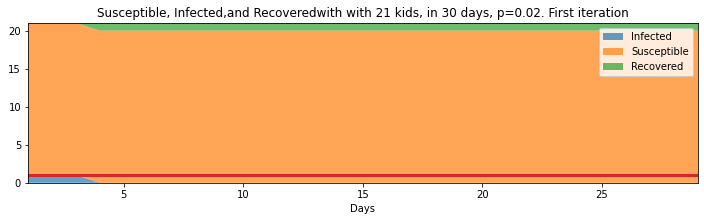

In [6]:
#collapse
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize=(12, 10))

########## Plotting the first iteration #################
ax = [fig.add_subplot(311, axisbelow=True)]

pal = sns.color_palette("tab10")
max_infected=max(summary_df_replications["infected"][0:days])
#top plot
ax[0].stackplot(summary_df_replications["day"][0:days],
                summary_df_replications["infected"][0:days],
                summary_df_replications["susceptible"][0:days],
                summary_df_replications["recovered"][0:days],
                colors=pal, alpha=0.7)
ax[0].set_title(f'Susceptible, Infected,and Recoveredwith with {kids} kids, in {days} days, p={p}. First iteration')
ax[0].set_xlabel('Days')
ax[0].legend([
    'Infected', 
    'Susceptible', 
    'Recovered'], 
    loc='best')
ax[0].set_xlim(1, days-1)
ax[0].set_ylim(0, kids)

#this plots a line with the max infected
ax[0].annotate("Max infected(%.2f)"%(max_infected),
    (0, max_infected),(0+3, max_infected+3), 
               #(max_infected, max_infected),
    arrowprops=dict(arrowstyle='->'))
ax[0].plot(np.array([0, days-1]), [max_infected, max_infected], lw=3, label='Max Infected')



In [7]:
summary_df_replications_Table= summary_df_replications.rename(columns={"day": "Day","infected":"Infected", "susceptible":"Susceptible",
                                                                       "recovered":"Removed","probability": "Probability", 
                                                                       "count_prn": "Cumulative PRNs" } )
#summary_df_replications_Table.iloc[0:int(last_infected)]
#type summary_df_replications_Table = summary_df_replications_Table.astype({"Day": int, "Infected": int}) 

In [8]:
#collapse
##################### Calculating the Means for each day ####################
#calculates the mean per replications
#not correcto start
mean_replications = pd.DataFrame(summary_last_recovered.mean(axis=0)).T
mean_replications
# not correcto end

#mean of first iteration
#print(summary_df_replications["infected"][0:days].mean())

#mean of the day 1 
#print(f'Mean of day 1 :{summary_df_replications["infected"][0].mean()}')

#mean of all days 1
mean_of_days_infected=[]
mean_of_days_susceptible=[]
mean_of_days_removed=[]

#calculating the variance per day
var_of_days_infected=[]
var_of_days_susceptible=[]
var_of_days_removed=[]

#creating a table only for the infected values 
#if the mean is taking for all of the days including the 0 the mean will also include zero values

#set the range of the days

x=range(1,days)

for i in range(0,days-1):
    mean_of_days_infected.append(summary_df_replications["infected"][i].mean())
    mean_of_days_susceptible.append(summary_df_replications["susceptible"][i].mean())
    mean_of_days_removed.append(summary_df_replications["recovered"][i].mean())
    #for the variance
    var_of_days_infected.append(summary_df_replications["infected"][i].var())
    var_of_days_susceptible.append(summary_df_replications["susceptible"][i].var())
    var_of_days_removed.append(summary_df_replications["recovered"][i].var())
    
    #print(summary_df_replications["infected"][i].mean())

#print(f'mean of each day {mean_of_days_infected}')
dataframe_means= pd.DataFrame(data={'Day':x,
                                    'mean_per_day_infected':mean_of_days_infected,
                                    'mean_of_days_susceptible':mean_of_days_susceptible,
                                    'mean_of_days_removed':mean_of_days_removed})
#creates a dataframeof the variances
dataframe_variance=pd.DataFrame(data={'Day':x,
                              'Variance per day Infected':var_of_days_infected,
                              'Variance per day Susceptible':var_of_days_susceptible,
                              'Variance per day Recovered':var_of_days_removed} )

In [9]:
#Calculates the day that there is not more infected from the means of each replications
last_infected_mean= getDayNoInfection(dataframe_means,'mean_per_day_infected')
print(f'Day that no more kids gets infected {last_infected_mean}th day')
dataframe_means
print()
mean_days, array_days= getDaysOfNoInfectionsMean(summary_df_replications)
End_total_infection = summary_df_replications[summary_df_replications["infected"]<1]
#End_total_infection[]
#getDaysOfNoInfectionsMean(summary_df_replications)

Day that no more kids gets infected 21th day



2.62


Text(0, 0.5, 'Expected Value and Variance of Infected')

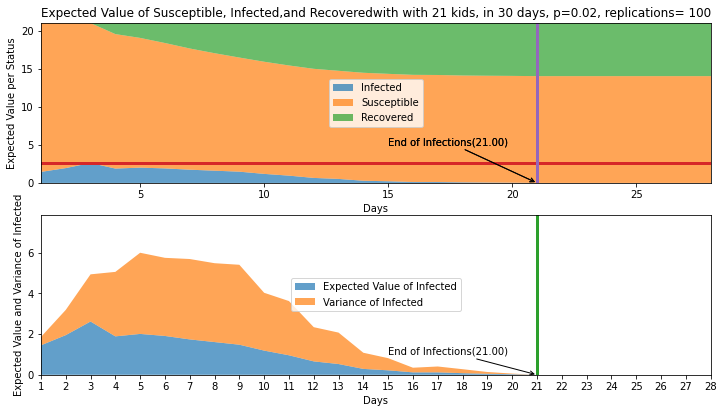

In [10]:
#collapse
#this plots the info in a stack
fig = plt.figure(figsize=(12, 10))
ax = [fig.add_subplot(311, axisbelow=True),
      fig.add_subplot(312, axisbelow=True)]

plt.xticks(np.arange(min(x), max(x)+1, 1.0))

max_infected_means=max(dataframe_means["mean_per_day_infected"][0:days])
print(max_infected_means)
ax[0].stackplot(dataframe_means["Day"][0:days],
                dataframe_means["mean_per_day_infected"][0:days],
                dataframe_means["mean_of_days_susceptible"][0:days],
                dataframe_means["mean_of_days_removed"][0:days],
                colors=pal, alpha=0.7)

ax[0].set_title(f'Expected Value of Susceptible, Infected,and Recoveredwith with {kids} kids, in {days} days, p={p}, replications= {replications}')
ax[0].set_xlabel('Days')
ax[0].set_ylabel('Expected Value per Status')
ax[0].legend([
    'Infected', 
    'Susceptible', 
    'Recovered'], 
    loc='center')
ax[0].set_xlim(1, days-2)

ax[0].set_ylim(0, kids)

#this plots a line with the max infected
ax[0].annotate("Max infected(%.2f)"%(max_infected_means),
    (0, max_infected_means),(0+3, max_infected_means+3), 
               #(max_infected, max_infected),
    arrowprops=dict(arrowstyle='->'))
ax[0].plot(np.array([0, days-1]), [max_infected_means, max_infected_means], lw=3, label='Max Infected Means')


#this plots a line with the last day infected
ax[0].annotate("End of Infections(%.2f)"%(last_infected_mean),
    (last_infected_mean, 0),(last_infected_mean-6, 0+5), 
               #(max_infected, max_infected),
    arrowprops=dict(arrowstyle='->'))
ax[0].annotate("End of Infections(%.2f)"%(last_infected_mean),
    (last_infected_mean, 0),(last_infected_mean-6, 0+5), 
               #(max_infected, max_infected),
    arrowprops=dict(arrowstyle='->'))
ax[0].plot(np.array([last_infected_mean,last_infected_mean]), [0, kids], lw=3, label='Last Infected Means')



#############################################################################################
#This plot is for the infected on the sencond part 
ax[1].set_xlim(1, days-2)
ax[1].set_ylim(0, max_infected_means*3)

ax[1].stackplot(x,
                dataframe_means["mean_per_day_infected"][0:days-1],
                dataframe_variance["Variance per day Infected"][0:days-1],
                colors=pal, alpha=0.7)
ax[1].legend([
    'Expected Value of Infected', 
    'Variance of Infected'], 
    loc='center')
#this plots a vertical line of end of infection in plot 2
ax[1].annotate("End of Infections(%.2f)"%(last_infected_mean),
    (last_infected_mean, 0),(last_infected_mean-6, 0+1), 
               #(max_infected, max_infected),
    arrowprops=dict(arrowstyle='->'))
ax[1].plot(np.array([last_infected_mean,last_infected_mean]), [0, kids], lw=3, label='Last Infected Means')

#sets x title
ax[1].set_xlabel('Days')
ax[1].set_ylabel('Expected Value and Variance of Infected')
